In [1]:
import numpy as np
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

2023-12-04 13:26:50.069727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.10.0


In [2]:
# Load mnist data
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/Users/hideakinagaya/anaconda3/envs/py3_10/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [3]:
# Split into train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Check the shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


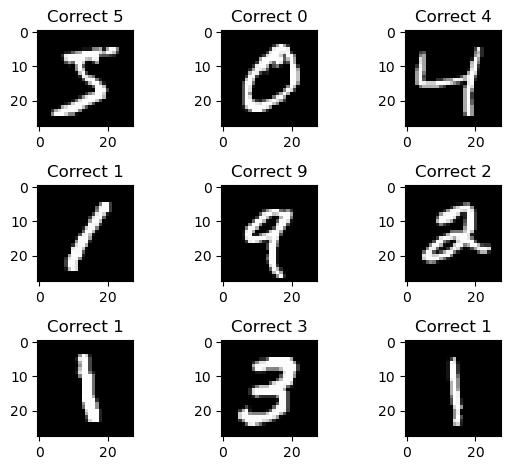

In [5]:
# Check the image and correct of train data
plt.figure(tight_layout=True)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Correct {}".format(y_train[i]))

In [6]:
# Reshape and normalize the tran and test images 
x_train = x_train.reshape((60000, 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((10000, 28 * 28)).astype("float32") / 255

# Sequential API

In [7]:
# Build model for Sequential API
def build_model_s():
    # build model
    model = Sequential()
    model.add(Input(shape=(28 * 28,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # complile model
    model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
    
    return model

In [8]:
# Fit motel
def fit_model(input_model, xtrain, ytrain, EPOCHS):
    model_history = input_model.fit(
    xtrain,
    ytrain,
    epochs=EPOCHS,
    validation_split = 0.2,
    )
    return model_history

In [9]:
# Build model and check model summary
model_s = build_model_s()
model_s.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


2023-12-04 13:27:00.093893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


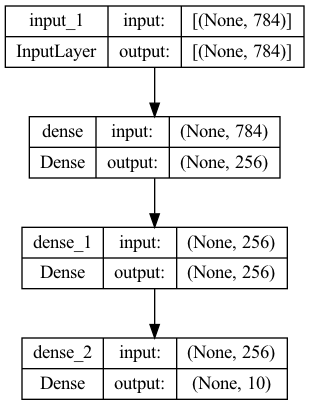

In [10]:
# Plot model 
plot_model(model_s, 'model_s.png', show_shapes=True)

In [11]:
# Fit model
history_s = fit_model(model_s, x_train, y_train, 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2245 - accuracy: 0.9324 - val_loss: 0.1092 - val_accuracy: 0.9674
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0908 - accuracy: 0.9720 - val_loss: 0.0891 - val_accuracy: 0.9726
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0620 - accuracy: 0.9808 - val_loss: 0.0846 - val_accuracy: 0.9751
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.0973 - val_accuracy: 0.9726
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0976 - val_accuracy: 0.9745


In [12]:
# Evaluate the model with test data
result_s = model_s.evaluate(x_test, y_test)
result_s

313/313 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9782


[0.08788810670375824, 0.9782000184059143]

In [13]:
# Predict with test data
preds_s = model_s.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [14]:
# Check the highest accuracy of predictions with correct answer
print(f"prediction: {np.argmax(preds_s[0])}, correct: {y_test[0]}")

prediction: 7, correct: 7


# Functional API

In [15]:
# Build model for Functional API
def build_model_f():
    
    # build model
    inputs = Input(shape=(28 * 28,))
    x = Dense(256, activation="relu")(inputs)
    x = Dense(256, activation="relu")(x)
    outputs = Dense(10, activation="softmax")(x)
    model = Model(inputs=inputs, outputs=outputs)
    
    # complile model
    model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])  
    
    return model

In [16]:
# Build model and check model summary
model_f = build_model_f()
model_f.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


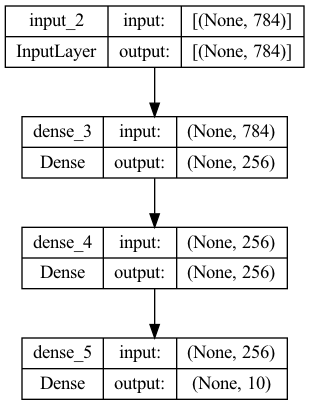

In [17]:
# Plot model 
plot_model(model_f, 'model_f.png', show_shapes=True)

In [18]:
# Fit model
history_f = fit_model(model_f, x_train, y_train, 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2179 - accuracy: 0.9345 - val_loss: 0.1134 - val_accuracy: 0.9674
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0890 - accuracy: 0.9717 - val_loss: 0.1288 - val_accuracy: 0.9621
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0611 - accuracy: 0.9807 - val_loss: 0.0916 - val_accuracy: 0.9718
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0928 - val_accuracy: 0.9739
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.1223 - val_accuracy: 0.9707


In [19]:
# Evaluate the model with test data
result_f = model_f.evaluate(x_test, y_test)
result_f

313/313 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9735


[0.10185100883245468, 0.9735000133514404]

In [20]:
# Predict with test data
preds_f = model_f.predict(x_test)

313/313 [==============================] - 0s 949us/step


In [21]:
# Check the highest accuracy of predictions with correct answer
print(f"prediction: {np.argmax(preds_f[0])}, correct: {y_test[0]}")

prediction: 7, correct: 7


# Subclassing API

In [22]:
# Build Mymodel
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = Dense(256, activation='relu')
        self.d2 = Dense(256, activation='relu')
        self.d3 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

In [23]:
# Build model for Subclassing API
def build_model_c():
    
    model = MyModel()
    
    # complile model
    model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])  
    
    return model

In [24]:
# Build model
model_c = build_model_c()

In [25]:
# Fit model
history_c = fit_model(model_c, x_train, y_train, 5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2218 - accuracy: 0.9331 - val_loss: 0.1101 - val_accuracy: 0.9661
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0918 - accuracy: 0.9714 - val_loss: 0.0984 - val_accuracy: 0.9689
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0891 - val_accuracy: 0.9734
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.1002 - val_accuracy: 0.9718
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.1006 - val_accuracy: 0.9746


In [26]:
# Evaluate the model with test data
result_c = model_c.evaluate(x_test, y_test)
result_c

313/313 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9776


[0.07264738529920578, 0.9775999784469604]

In [27]:
# Predict with test data
preds_c = model_c.predict(x_test)

# Check the highest accuracy of predictions with correct answer
print(f"prediction: {np.argmax(preds_c[0])}, correct: {y_test[0]}")

313/313 [==============================] - 1s 2ms/step
prediction: 7, correct: 7


In [28]:
# Check the prediction with test data
for i in range(10):
    print(f"prediction: {np.argmax(preds_c[i])}, correct: {y_test[i]}")

prediction: 7, correct: 7
prediction: 2, correct: 2
prediction: 1, correct: 1
prediction: 0, correct: 0
prediction: 4, correct: 4
prediction: 1, correct: 1
prediction: 4, correct: 4
prediction: 9, correct: 9
prediction: 5, correct: 5
prediction: 9, correct: 9


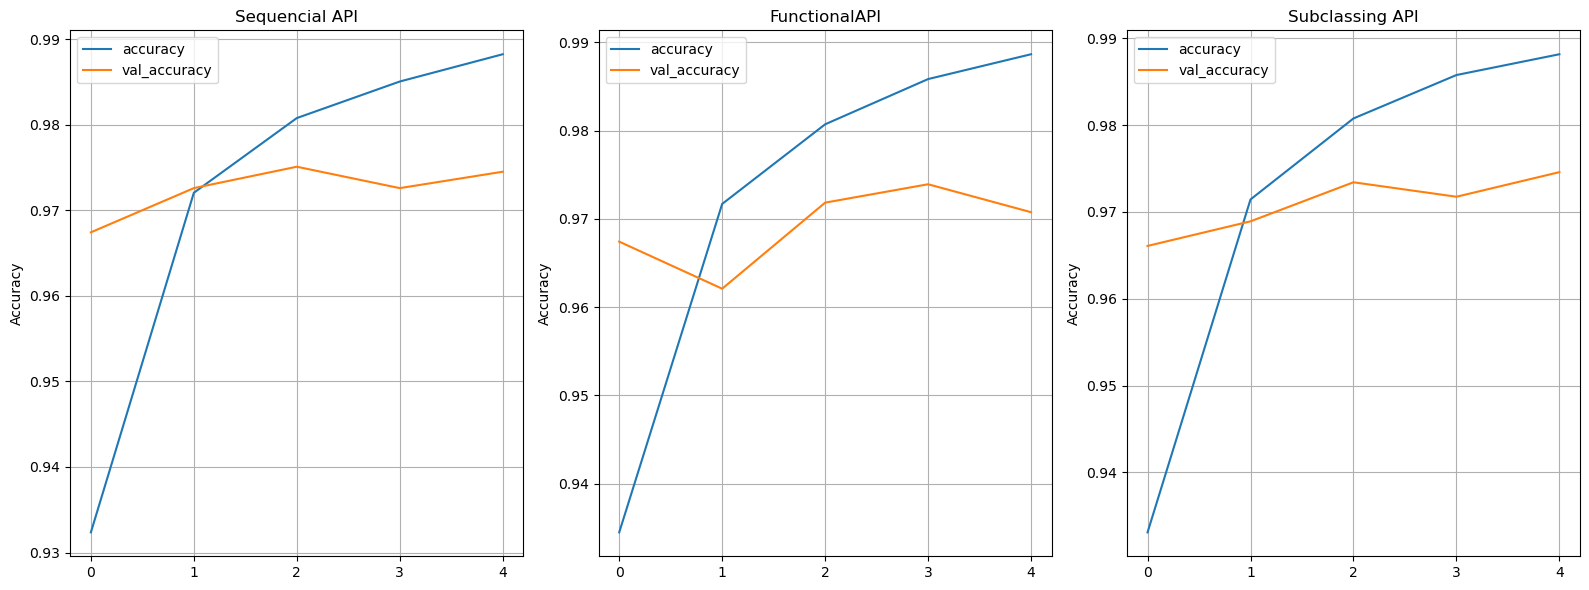

In [29]:
# Plot accuracy
plt.figure(figsize = (16, 6), tight_layout=True)
histories = [history_s, history_f, history_c]
titles = ['Sequencial API', 'FunctionalAPI', 'Subclassing API']

# for i, (history, title) in enumerate(zip(histories, titles)):
#     plt.subplot(1,3,i+1)
#     plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
#     plotter.plot({'': history}, metric= 'accuracy')
#     plt.title(title)
#     plt.xticks([i for i in range(5)])
#     plt.ylabel('Accuracy')   

    
for i, (history, title) in enumerate(zip(histories, titles)):
    plt.subplot(1,3,i+1)
    legend = []
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'])
        legend.append('accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], '')
        legend.append('val_accuracy')
    plt.legend(legend, loc ="upper left")
    plt.grid()
    plt.title(title)
    plt.xticks([i for i in range(5)])
    plt.ylabel('Accuracy')   

In [30]:
# Split into correct and incorrect predictions with idx
predicted_class = np.argmax(preds_c,axis=1)
correct_idxs = np.nonzero(predicted_class == y_test)[0]
incorrect_idxs = np.nonzero(predicted_class != y_test)[0]

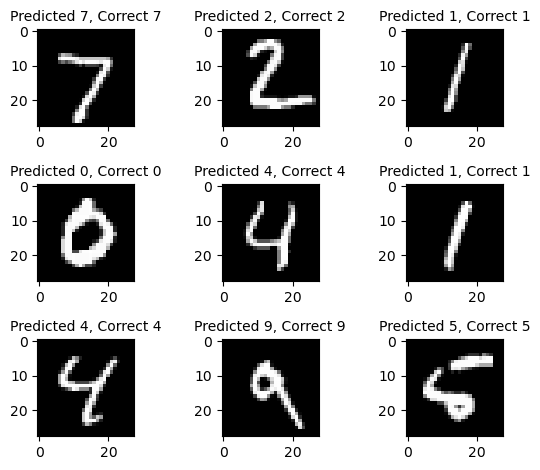

In [31]:
# Plot correct predicted data with test data
plt.figure(tight_layout=True)
for i, correct in enumerate(correct_idxs[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Correct {}".format(predicted_class[correct], y_test[correct]), fontsize=10)


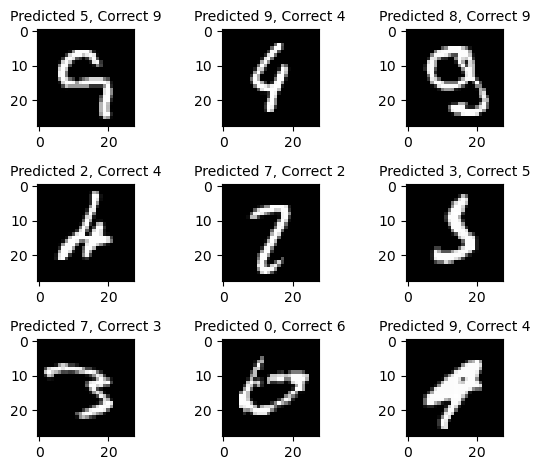

In [32]:
# Plot incorrect predicted data with test data
plt.figure(tight_layout=True)
for i, incorrect in enumerate(incorrect_idxs[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Correct {}".format(predicted_class[incorrect], y_test[incorrect]), fontsize=10)

# Option1

In [33]:
# Shuffle train data
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [34]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [35]:
# Fit model
def fit_model1(input_model, dataset, EPOCHS):
    model_history = input_model.fit(
    dataset,
    epochs=EPOCHS,
    validation_steps=30
    )
    return model_history

In [36]:
# Fit model by different API
history_s = fit_model1(model_s, train_ds, 5)
history_f = fit_model1(model_f, train_ds, 5)
history_c = fit_model1(model_c, train_ds, 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0432 - accuracy: 0.9866
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0315 - accuracy: 0.9900
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0413 - accuracy: 0.9870
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0290 - accuracy: 0.9904
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0255 - accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0226 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0211 - acc

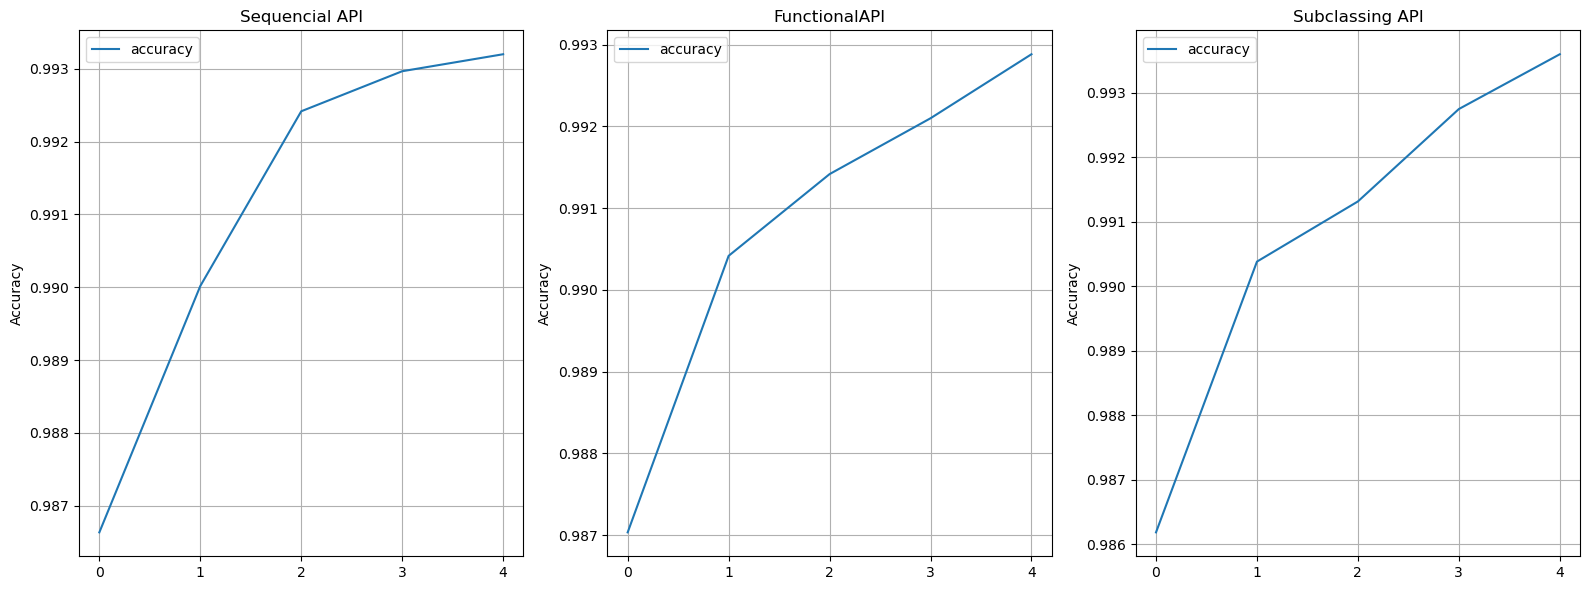

In [37]:
# Plot accuracy
plt.figure(figsize = (16, 6), tight_layout=True)
histories = [history_s, history_f, history_c]
titles = ['Sequencial API', 'FunctionalAPI', 'Subclassing API']

for i, (history, title) in enumerate(zip(histories, titles)):
    plt.subplot(1,3,i+1)
    legend = []
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'])
        legend.append('accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], '')
        legend.append('val_accuracy')
    plt.legend(legend, loc ="upper left")
    plt.grid()
    plt.title(title)
    plt.xticks([i for i in range(5)])
    plt.ylabel('Accuracy')  

# Option2

In [38]:
# Spilit into train and validation data
idx = int(x_train.shape[0] * 0.2)
x_train, x_val = x_train[idx:], x_train[:idx]
y_train, y_val = y_train[idx:], y_train[:idx]

In [39]:
# Fit model
def fit_model2(input_model, xtrain, ytrain, xval, yval, EPOCHS):
    model_history = input_model.fit(
    xtrain,
    ytrain,
    epochs=EPOCHS,
    validation_data = (xval, yval)
    )
    return model_history

In [40]:
# Fit model by different API
history_s = fit_model2(model_s, x_train, y_train, x_val, y_val, 5)
history_f = fit_model2(model_f, x_train, y_train, x_val, y_val, 5)
history_c = fit_model2(model_c, x_train, y_train, x_val, y_val, 5)

Epoch 1/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0198 - val_accuracy: 0.9941
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0338 - val_accuracy: 0.9902
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0253 - val_accuracy: 0.9923
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0210 - val_accuracy: 0.9938
Epoch 5/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0344 - val_accuracy: 0.9906
Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0172 - val_accuracy: 0.9942
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0237 - val_accuracy: 0.9918

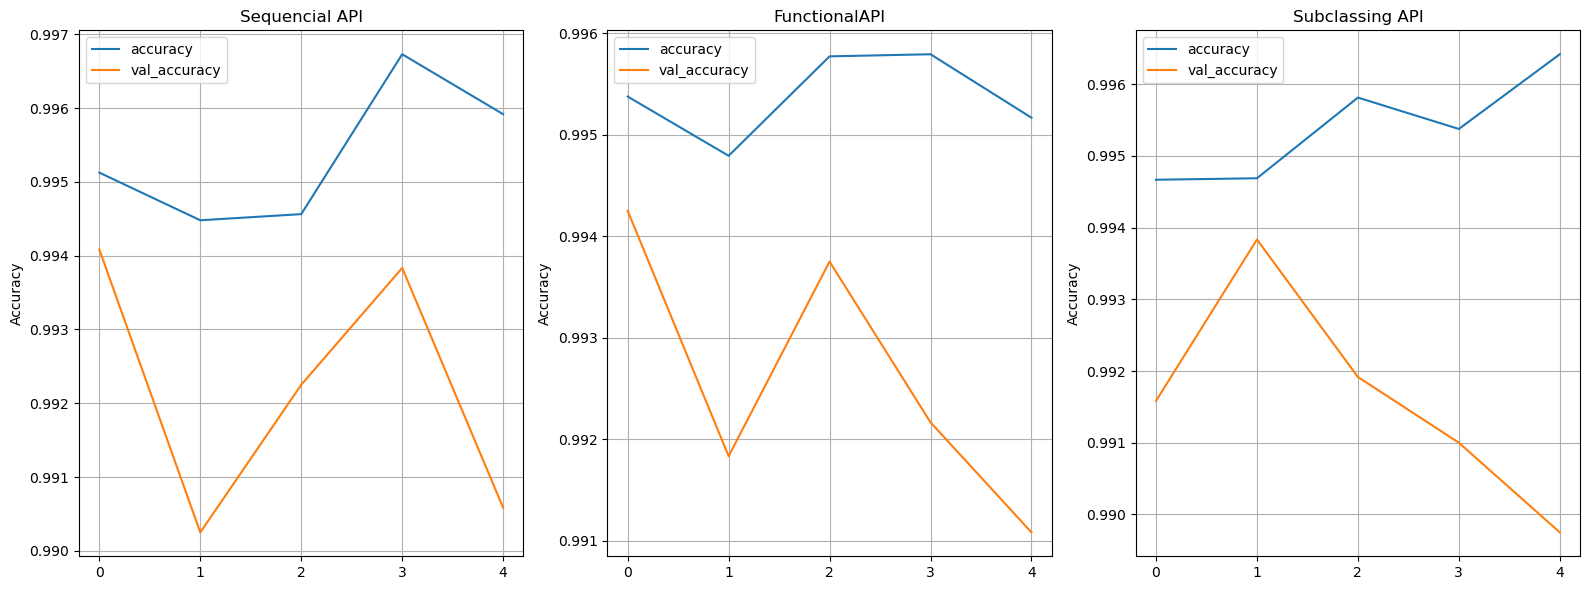

In [41]:
# Plot accuracy
plt.figure(figsize = (16, 6), tight_layout=True)
histories = [history_s, history_f, history_c]
titles = ['Sequencial API', 'FunctionalAPI', 'Subclassing API']

for i, (history, title) in enumerate(zip(histories, titles)):
    plt.subplot(1,3,i+1)
    legend = []
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'])
        legend.append('accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], '')
        legend.append('val_accuracy')
    plt.legend(legend, loc ="upper left")
    plt.grid()
    plt.title(title)
    plt.xticks([i for i in range(5)])
    plt.ylabel('Accuracy')    